## **MSc Major Research Project**

## **Exploring the effect of daytime physical activity on sleep quality**

Melania Czobit

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/MRP/FitbitClean.csv'
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,...,weekday,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency,class
0,2015-08-01,67918.0,97.0,80.455666,14.178942,11419.0,10.0,637.0,217.0,30.0,...,5,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
1,2015-08-02,67918.0,59.0,93.715698,10.107015,9042.0,10.0,1174.0,234.0,26.0,...,6,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
2,2015-08-03,67918.0,97.0,77.604469,12.975431,6327.0,6.0,673.0,175.0,7.0,...,0,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
3,2015-08-04,67918.0,59.0,90.791718,13.081469,13092.0,18.0,1118.0,205.0,35.0,...,1,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
4,2015-08-05,67918.0,100.0,79.504982,14.706803,12689.0,47.0,563.0,261.0,15.0,...,2,23:13:00,9:00:00,588.0,2.0,0.0,547.0,39.0,0.933447,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45870,2016-07-28,36501.0,98.0,50.556137,13.650418,5965.0,6.0,647.0,183.0,26.0,...,3,23:31:30,9:26:30,596.0,0.0,0.0,538.0,58.0,0.902685,5
45871,2016-07-29,36501.0,97.0,52.905212,13.897326,8814.0,34.0,586.0,244.0,18.0,...,4,0:54:00,10:27:00,574.0,1.0,0.0,553.0,20.0,0.965096,5
45872,2016-07-30,36501.0,96.0,49.838959,8.438036,4890.0,11.0,698.0,248.0,4.0,...,5,2:15:30,10:19:30,485.0,5.0,0.0,449.0,31.0,0.935417,5
45873,2016-07-31,36501.0,93.0,52.419224,15.835029,10229.0,7.0,618.0,225.0,14.0,...,6,1:58:30,9:54:30,477.0,20.0,0.0,434.0,23.0,0.949672,5


In [ ]:
df['class'] = df['class'].astype('category')

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

  results = adfuller(timeseries, autolag='AIC')
  # print('Results of Augmented Dickey Fuller Test')
  # print('Test Statistic: ' + str(results[0]))
  # print('p-value: ' + str(results[1]))
  # print('No. of lags used: ' + str(results[2]))
  # print('Number of observations used: ' + str(results[3]))

  # for key, value in results[4].items():
    # print('Critial Values:')
    # print(f'   {key}, {value}')

  if results[1] <= 0.05:
    print ("Reject null hypothesis. Data is stationary.")
  else:
    print ("Fail to reject null hypothesis. Data is non-stationary.")

Reject null hypothesis. Data is stationary.


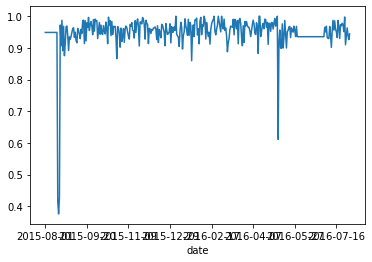

In [ ]:
user = df[df.egoid == 33657]
# user = df[df.egoid == 46558]
user = user.set_index('date')
test_stationarity(user['Efficiency'])
user['Efficiency'].plot()

In [ ]:
# check stationarity 
df_st= df.copy()
df_st = df_st.set_index('date')
df_st = df_st.drop(['timetobed','timeoutofbed'],axis=1)
for col in df_st.columns:
  print(col)
  test_stationarity(df[col])

egoid
Reject null hypothesis. Data is stationary.
complypercent
Reject null hypothesis. Data is stationary.
meanrate
Reject null hypothesis. Data is stationary.
sdrate
Reject null hypothesis. Data is stationary.
steps
Reject null hypothesis. Data is stationary.
floors
Reject null hypothesis. Data is stationary.
sedentaryminutes
Reject null hypothesis. Data is stationary.
lightlyactiveminutes
Reject null hypothesis. Data is stationary.
fairlyactiveminutes
Reject null hypothesis. Data is stationary.
veryactiveminutes
Reject null hypothesis. Data is stationary.
lowrangemins
Reject null hypothesis. Data is stationary.
fatburnmins
Reject null hypothesis. Data is stationary.
cardiomins
Reject null hypothesis. Data is stationary.
peakmins
Reject null hypothesis. Data is stationary.
month
Reject null hypothesis. Data is stationary.
weekday
Reject null hypothesis. Data is stationary.
bedtimedur
Reject null hypothesis. Data is stationary.
minstofallasleep
Reject null hypothesis. Data is stationa

In [ ]:
df['class'].value_counts()

5    45302
3      337
4      179
2       52
1        5
Name: class, dtype: int64

### **Linear Regression**

In [ ]:
import statsmodels.api as sm
df2 = df.copy()
df2 = df2.set_index('date')

# df2
x_columns = ["meanrate", "sdrate", "steps", "floors", "sedentaryminutes", "lightlyactiveminutes", "fairlyactiveminutes", "veryactiveminutes","lowrangemins","fatburnmins","cardiomins","peakmins", "month", "weekday"]
y = df2["Efficiency"]


def get_stats():
    x = df2[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             Efficiency   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          5.859e+05
Date:                Sat, 06 Aug 2022   Prob (F-statistic):                        0.00
Time:                        16:46:08   Log-Likelihood:                          56876.
No. Observations:               45875   AIC:                                 -1.137e+05
Df Residuals:                   45861   BIC:                                 -1.136e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
x_columns.remove('floors')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             Efficiency   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          6.309e+05
Date:                Sat, 06 Aug 2022   Prob (F-statistic):                        0.00
Time:                        16:47:08   Log-Likelihood:                          56875.
No. Observations:               45875   AIC:                                 -1.137e+05
Df Residuals:                   45862   BIC:                                 -1.136e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### **Logistic Regression**

In [ ]:
# activity metrics: 'meanrate', 'sdrate', 'steps', 'floors', 'sedentaryminutes', 'lightlyactiveminutes', 'fairlyactiveminutes', 'veryactiveminutes', 'lowrangemins', 'fatburnmins', 'cardiomins', 'peakmins', 'month', 'weekday'

In [ ]:
accuracy = []

X = df.drop(['date','timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = df['class']

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', penalty='l2',max_iter=5000)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc =accuracy_score(y_test,y_pred)
accuracy.append(acc)

print('Accuracy: ', (sum(accuracy)/len(accuracy)))
print('Precision score: ', metrics.precision_score(y_test, y_pred, average='weighted'))
print(metrics.classification_report(y_test,y_pred))

Accuracy:  0.9870299727520436
Precision score:  0.9742281671108999
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00        38
           5       0.99      1.00      0.99      9056

    accuracy                           0.99      9175
   macro avg       0.25      0.25      0.25      9175
weighted avg       0.97      0.99      0.98      9175



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
df2 = df.copy()
df2 = df2.set_index('date')

# df2
x_columns = ["meanrate", "sdrate", "steps", "floors", "sedentaryminutes", "lightlyactiveminutes", "fairlyactiveminutes", "veryactiveminutes","lowrangemins","fatburnmins","cardiomins","peakmins", "month", "weekday"]
y = df2["class"]


def get_stats():
    x = df2[x_columns]
    sc_X = StandardScaler()
    x = sc_X.fit_transform(x)
    results = sm.MNLogit(y, x).fit()
    print(results.summary())
get_stats()

Optimization terminated successfully.
         Current function value: 1.609096
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                  class   No. Observations:                45875
Model:                        MNLogit   Df Residuals:                    45819
Method:                           MLE   Df Model:                           52
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                  -19.41
Time:                        18:20:20   Log-Likelihood:                -73817.
converged:                       True   LL-Null:                       -3616.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
   class=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.027     -0.068      0.946      -0.054       0.050
x2            -0.0037      0.

In [ ]:
import statsmodels.api as sm
df2 = df.copy()
df2 = df2.set_index('date')

# df2
x_columns = ["meanrate", "sdrate", "steps", "floors", "sedentaryminutes", "lightlyactiveminutes", "fairlyactiveminutes", "veryactiveminutes","lowrangemins","fatburnmins","cardiomins","peakmins", "month", "weekday"]
y = df2["Efficiency"]


def get_stats():
    x = df2[x_columns]
    results = sm.Logit(y, x).fit()
    print(results.summary())
get_stats()

Optimization terminated successfully.
         Current function value: 0.095428
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Efficiency   No. Observations:                45875
Model:                          Logit   Df Residuals:                    45861
Method:                           MLE   Df Model:                           13
Date:                Sat, 06 Aug 2022   Pseudo R-squ.:                  -8.779
Time:                        16:25:27   Log-Likelihood:                -4377.7
converged:                       True   LL-Null:                       -447.66
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
meanrate                 0.0141      0.003      5.012      0.000       0.009       0.020

In [ ]:
# training model with independent variables: sedentary minutes and low range minutes
X = df.drop(['date','egoid','complypercent', 'timetobed', 'timeoutofbed','bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency'], axis=1)
X = X.drop('class',axis=1)
X = X.drop(['meanrate','sdrate','steps', 'floors','lightlyactiveminutes', 'fairlyactiveminutes', 'veryactiveminutes', 'fatburnmins', 'cardiomins', 'peakmins', 'month', 'weekday'], axis=1) 
y = df['class']

In [ ]:
acc = []
p = []
r = []
f1 = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]      
  y_train, y_test = y.iloc[train_index],  y.iloc[test_index]

  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.fit_transform(X_test)


  model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', penalty='l2',max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  score =accuracy_score(y_test,y_pred)
  acc.append(score)
  precision = metrics.precision_score(y_test,y_pred, average='weighted')
  p.append(precision)
  recall = metrics.recall_score(y_test, y_pred, average='weighted')
  r.append(recall)
  f1score = metrics.f1_score(y_test,y_pred, average='weighted')
  f1.append(f1score)

print('Average accuracy:', round((sum(acc)/len(acc)),4))
print('Average precision:', round((sum(p)/len(p)),4))
print('Average recall:', round((sum(r)/len(r)),4))
print('Average F1-Score:', round((sum(f1)/len(f1)),4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average accuracy: 0.6094
Average precision: 0.9809
Average recall: 0.6094
Average F1-Score: 0.7432


Result for participant 46558

In [ ]:
df2 = df2[df2.egoid==46558]
df2["class"].value_counts()

3    237
4     99
5     18
2     13
Name: class, dtype: int64

In [ ]:
user = df[df.egoid==46558]

X = user.drop(['egoid','date','timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = user['class']
y = np.array(y)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

kf = KFold(n_splits=10)
acc = []
for train_index, test_index in kf.split(X):
  
  X_train, X_test = X[train_index], X[test_index]       
  y_train,  y_test = y[train_index],  y[test_index]

  # model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', penalty='l2',max_iter=5000)
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score =accuracy_score(y_test,y_pred)
  acc.append(score)

print('average accuracy: ', (sum(acc)/len(acc)))

average accuracy:  0.621021021021021


In [ ]:
acc = []
user = df[df.egoid==46558]
# steps
X = user.drop(['date','egoid','complypercent','peakmins','floors','sdrate','steps','month','weekday','veryactiveminutes','cardiomins','fatburnmins','timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = user['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', penalty='l2',max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score =accuracy_score(y_test,y_pred)
print(score)
print(metrics.classification_report(y_test, y_pred))

0.47297297297297297
              precision    recall  f1-score   support

           2       0.06      1.00      0.11         1
           3       0.86      0.46      0.60        52
           4       0.47      0.47      0.47        19
           5       0.11      0.50      0.18         2

    accuracy                           0.47        74
   macro avg       0.37      0.61      0.34        74
weighted avg       0.73      0.47      0.55        74



In [ ]:
# indepedent variables = mean rate, sedentary minutes and lightly active minutes

df2 = df.copy()
df2 = df2[df2.egoid==46558]
X = df2.drop(['date','egoid','complypercent', 'timetobed', 'timeoutofbed','bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency'], axis=1)
X = X.drop('class',axis=1)
X = X.drop(['sdrate','floors','steps', 'fairlyactiveminutes', 'veryactiveminutes', 'fatburnmins', 'lowrangemins','cardiomins', 'peakmins','month', 'weekday'], axis=1) 
y = df2['class']

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = np.array(y)

kf = KFold(n_splits=10)
acc = []
for train_index, test_index in kf.split(X):
  
  X_train, X_test = X[train_index], X[test_index]       
  y_train,  y_test = y[train_index],  y[test_index]

  # model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', penalty='l2',max_iter=5000)
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score =accuracy_score(y_test,y_pred)
  acc.append(score)

print('average accuracy: ', (sum(acc)/len(acc)))

average accuracy:  0.6534534534534534


Result for participant 33657

In [ ]:
user = df[df.egoid==33657]
user['class'].value_counts()

5    363
3      2
2      1
4      1
1      0
Name: class, dtype: int64

In [90]:
user = df[df.egoid==33657]

X = user.drop(['timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = user['class']


tscv = TimeSeriesSplit(n_splits=5)
acc = []

for train_index, test_index in tscv.split(X):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]      
  y_train, y_test = y.iloc[train_index],  y.iloc[test_index]

  X_train = X_train.drop(['date','egoid'],axis=1)
  X_test = X_test.drop(['date','egoid'], axis=1)

  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.fit_transform(X_test)

  model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2',max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score =accuracy_score(y_test,y_pred)
  acc.append(score)

print('average accuracy: ', (sum(acc)/len(acc)))

average accuracy:  0.9967213114754099


In [ ]:
# independent variables = mean rate and peak mins

df2 = df.copy()
df2 = df2[df2.egoid==33657]
X = df2.drop(['date','egoid','complypercent', 'timetobed', 'timeoutofbed','bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency'], axis=1)
X = X.drop('class',axis=1)
X = X.drop(['sdrate','floors','steps', 'sedentaryminutes','lightlyactiveminutes','fairlyactiveminutes', 'veryactiveminutes', 'fatburnmins', 'lowrangemins','cardiomins', 'month', 'weekday'], axis=1) 
y = df2['class']

acc = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]      
  y_train, y_test = y.iloc[train_index],  y.iloc[test_index]

  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.fit_transform(X_test)


  model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', penalty='l2',max_iter=5000)
  # model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  score =accuracy_score(y_test,y_pred)
  acc.append(score)
print('Average accuracy: ', (sum(acc)/len(acc)))
# print(metrics.classification_report(y_test, y_pred))

Average accuracy:  0.5743798593113661


In [ ]:
# independent variables: mean rate, sedentary minutes, lightly active minutes

df2 = df.copy()
df2 = df2[df2.egoid==33657]
X = df2.drop(['date','egoid','complypercent', 'timetobed', 'timeoutofbed','bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency'], axis=1)
X = X.drop('class',axis=1)
X = X.drop(['sdrate','floors','steps', 'fairlyactiveminutes', 'veryactiveminutes', 'fatburnmins', 'lowrangemins','cardiomins', 'peakmins','month', 'weekday'], axis=1) 
y = df2['class']

acc = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]      
  y_train, y_test = y.iloc[train_index],  y.iloc[test_index]

  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.fit_transform(X_test)


  model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', penalty='l2',max_iter=5000)
  # model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  score =accuracy_score(y_test,y_pred)
  acc.append(score)
print('Average accuracy: ', (sum(acc)/len(acc)))

Average accuracy:  0.530803406145872
